In [1]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.layers import BatchNormalization
import keras.callbacks as cb
from matplotlib import pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)
        
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')

In [3]:
# Load CIFAR10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


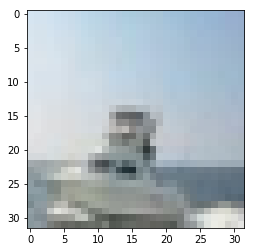

In [4]:
# Explore data
print(X_train.shape)
plt.imshow(X_train[100])

print(y_train.shape)
print(y_train[:10])

In [5]:
# Reshape input data
# X_train = X_train.reshape(X_train.shape[0], 32 * 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 32 * 32, 3)

In [6]:
# Explore input data after reshaping
# print(X_train.shape)

In [7]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Explore input data after normalization
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)
print(Y_train[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [14]:
def compile_and_fit_model(train_input, train_output, model, optimizer, batch_size=32, epochs=10, verbose=1):
    history = LossHistory()
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    
    model.fit(train_input, train_output, callbacks=[history], batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    plot_losses(history.losses)
    
    score = model.evaluate(X_test, Y_test, verbose=1)
    print(score)

In [15]:
# Prepare the model

model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

Epoch 1/10
50000/50000 [==============================] - 808s 16ms/step - loss: 1.7233 - acc: 0.3614
Epoch 2/10
50000/50000 [==============================] - 786s 16ms/step - loss: 1.3843 - acc: 0.4989
Epoch 3/10
50000/50000 [==============================] - 657s 13ms/step - loss: 1.2063 - acc: 0.5691
Epoch 4/10
50000/50000 [==============================] - 778s 16ms/step - loss: 1.0808 - acc: 0.6180
Epoch 5/10
50000/50000 [==============================] - 821s 16ms/step - loss: 0.9970 - acc: 0.6495
Epoch 6/10
50000/50000 [==============================] - 749s 15ms/step - loss: 0.9381 - acc: 0.6734
Epoch 7/10
50000/50000 [==============================] - 755s 15ms/step - loss: 0.8881 - acc: 0.6908
Epoch 8/10
50000/50000 [==============================] - 670s 13ms/step - loss: 0.8461 - acc: 0.7072
Epoch 9/10
50000/50000 [==============================] - 880s 18ms/step - loss: 0.8118 - acc: 0.7176
Epoch 10/10
10000/10000 [==============================] - 45s 4ms/step
[0.6718081

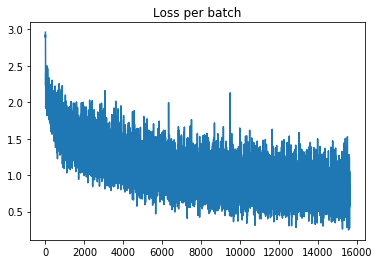

In [16]:
# Fit and test the model
compile_and_fit_model(X_train, Y_train, model_1, Adam(), 32, 10)

In [17]:
# Prepare the model

model_2 = Sequential()
model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(BatchNormalization())

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

# Fit and test the model
compile_and_fit_model(X_train, Y_train, model_2, Adam(), 32, 5)

Epoch 1/5
50000/50000 [==============================] - 1895s 38ms/step - loss: 1.9327 - acc: 0.2699
Epoch 2/5
50000/50000 [==============================] - 2014s 40ms/step - loss: 1.5797 - acc: 0.4192
Epoch 3/5
50000/50000 [==============================] - 2026s 41ms/step - loss: 1.3328 - acc: 0.5210
Epoch 4/5
50000/50000 [==============================] - 1842s 37ms/step - loss: 1.1579 - acc: 0.5908
Epoch 5/5
37696/50000 [=====================>........] - ETA: 7:23 - loss: 1.0271 - acc: 0.6422

KeyboardInterrupt: 